In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_data = datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, epochs=5, validation_data=val_data)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


C:\Users\S.A.N\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\S.A.N\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 515ms/step - accuracy: 0.8535 - loss: 0.3718 - val_accuracy: 0.7500 - val_loss: 0.5396
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - accuracy: 0.9647 - loss: 0.0979 - val_accuracy: 0.7500 - val_loss: 0.4592
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 479ms/step - accuracy: 0.9800 - loss: 0.0566 - val_accuracy: 0.8750 - val_loss: 0.2006
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 476ms/step - accuracy: 0.9860 - loss: 0.0416 - val_accuracy: 0.9375 - val_loss: 0.0879
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 478ms/step - accuracy: 0.9900 - loss: 0.0346 - val_accuracy: 0.9375 - val_loss: 0.0915


In [2]:
# Re-load validation data with shuffle=False
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

Found 16 images belonging to 2 classes.


In [3]:
val_data.reset()  # Reset to make sure prediction starts from beginning

# Get predicted probabilities and class labels
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Get actual labels
y_true = val_data.classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



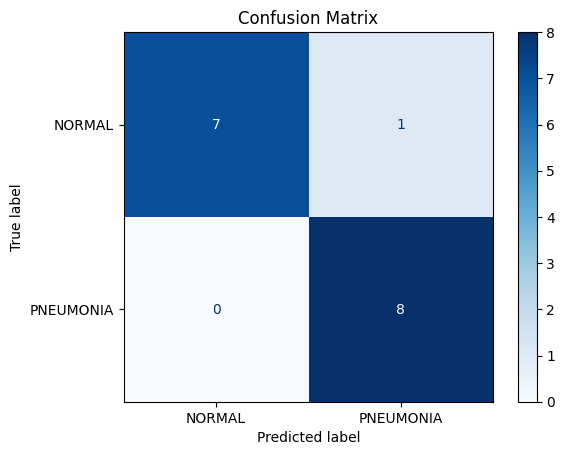

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Print classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

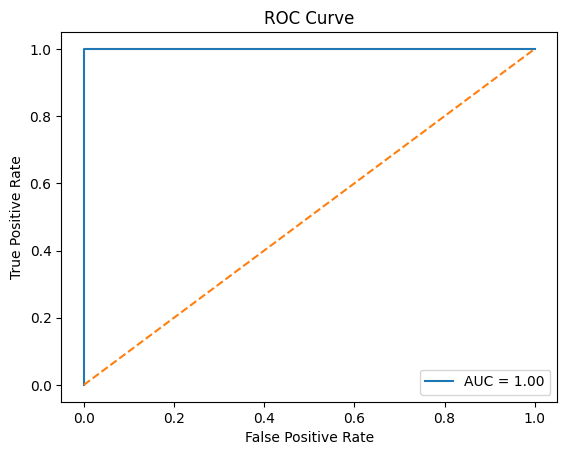

In [6]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()